In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = df.data.features 
y = df.data.targets 
  
# metadata 
print(df.metadata) 
  
# variable information 
print(df.variables) 


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/opt/anaconda3/envs/portfolio_data_projects/lib/python3.13/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
# Combine
df = X.copy()
df['readmitted'] = y

In [ ]:
# Load datasets
#diabetic_data = pd.read_csv('/Users/kobynaebow/Desktop/healthcare-data-portfolio/Project_3_Readmission_Prediction/data/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv')
#ids_mapping = pd.read_csv('/Users/kobynaebow/Desktop/healthcare-data-portfolio/Project_3_Readmission_Prediction/data/diabetes+130-us+hospitals+for+years+1999-2008/IDS_mapping.csv')

In [5]:
#Display first few rows
print("\nDiabetic Data Head:")
df.head()


Diabetic Data Head:


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

In [14]:
# Check percentage of missing values
missing_percentage = df.isnull().sum()
print("Percentage of Missing Values:\n", missing_percentage[missing_percentage > 0])

Percentage of Missing Values:
 diag_1              21
diag_2             358
diag_3            1423
max_glu_serum    96420
A1Cresult        84748
dtype: int64


In [8]:
# Check for duplicate rows in diabetic_data
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows in diabetic_data: {duplicate_rows}")


Number of duplicate rows in diabetic_data: 0


In [9]:
# Check unique values for each column in df
unique_values = df.nunique()
print("Unique values per column:\n", unique_values)

Unique values per column:
 race                          5
gender                        3
age                          10
weight                        9
admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
payer_code                   17
medical_specialty            72
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
diag_1                      716
diag_2                      748
diag_3                      789
number_diagnoses             16
max_glu_serum                 3
A1Cresult                     3
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide  

In [10]:
df = df.drop(["weight", "payer_code", "medical_specialty"], axis=1)  # High missingness
df["race"] = df["race"].fillna("Missing")

In [11]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#df.describe(include = 'all').T

In [15]:
df['readmitted_30'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [16]:
df.isna().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

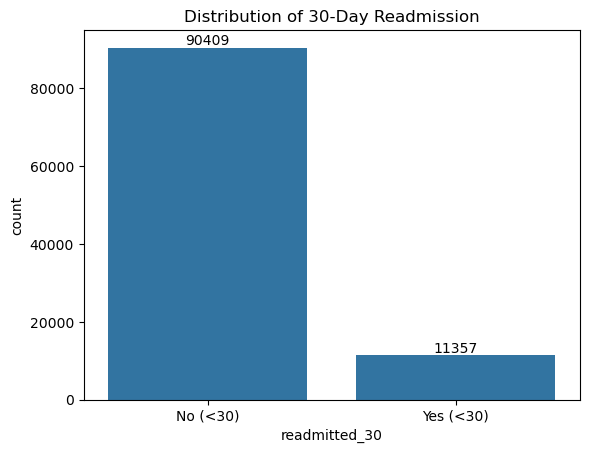

In [22]:
# Plot distribution
ax=sns.countplot(x='readmitted_30', data=df)
plt.title("Distribution of 30-Day Readmission")
plt.xticks([0,1], ['No (<30)', 'Yes (<30)'])
# Annotate each bar with count
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

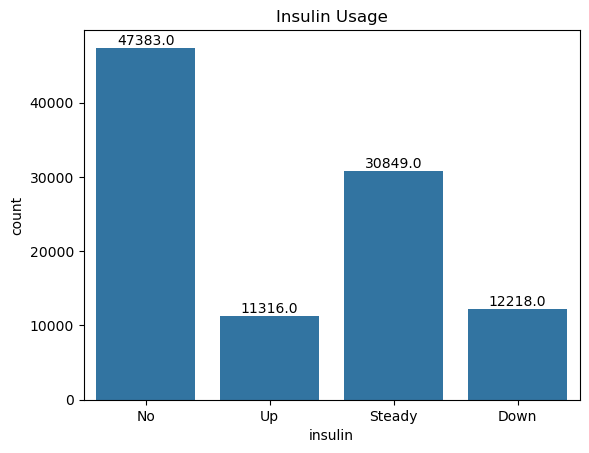

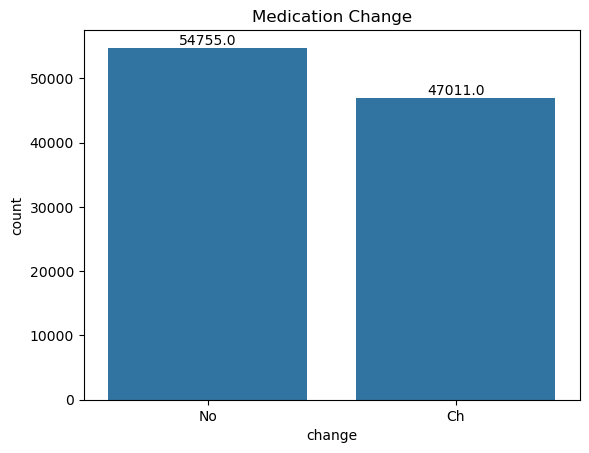

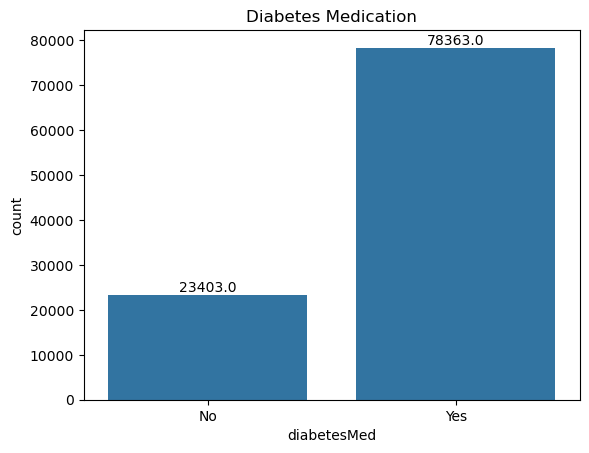

In [25]:
# Insulin usage
ax = sns.countplot(x='insulin', data=df)
plt.title("Insulin Usage")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()

# Change in medication
ax = sns.countplot(x='change', data=df)
plt.title("Medication Change")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()

# Diabetes Medication
ax = sns.countplot(x='diabetesMed', data=df)
plt.title("Diabetes Medication")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()

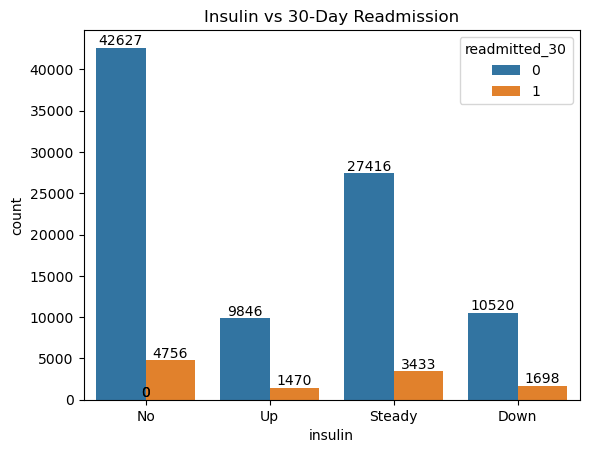

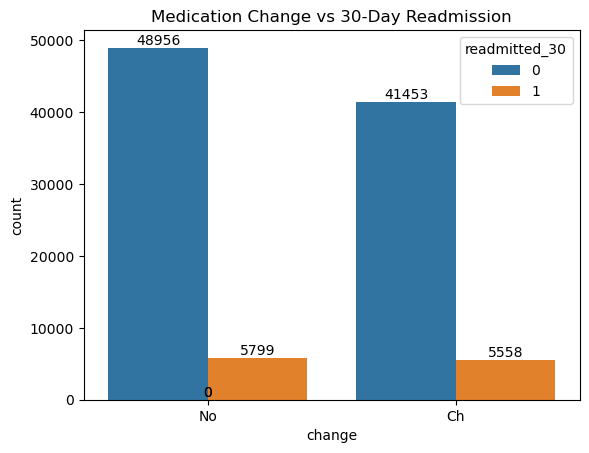

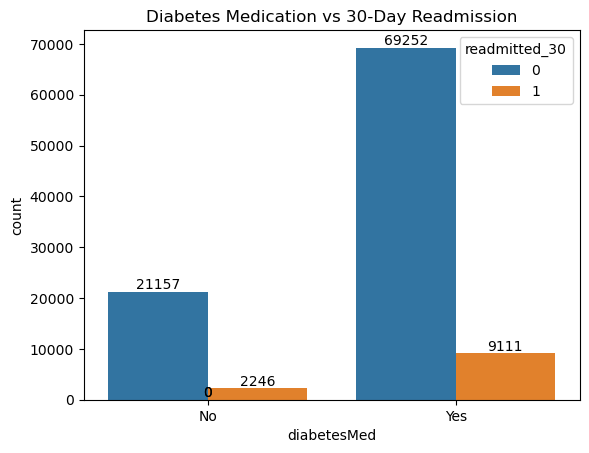

In [27]:
# Insulin vs readmission
ax = sns.countplot(x='insulin', hue='readmitted_30', data=df)
plt.title("Insulin vs 30-Day Readmission")
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show()

# Change vs readmission
ax = sns.countplot(x='change', hue='readmitted_30', data=df)
plt.title("Medication Change vs 30-Day Readmission")
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show()

# Diabetes Medication vs readmission
ax = sns.countplot(x='diabetesMed', hue='readmitted_30', data=df)
plt.title("Diabetes Medication vs 30-Day Readmission")
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show() 

In [28]:
from scipy.stats import chi2_contingency

# Insulin
pd.crosstab(df['insulin'], df['readmitted_30'])
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['insulin'], df['readmitted_30']))
print(f'Insulin vs Readmission p-value: {p}')
# Change
pd.crosstab(df['change'], df['readmitted_30'])
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['change'], df['readmitted_30']))
print(f'Change vs Readmission p-value: {p}')
# Diabetes Medication
pd.crosstab(df['diabetesMed'], df['readmitted_30'])
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['diabetesMed'], df['readmitted_30']))
print(f'Diabetes Medication vs Readmission p-value: {p}')


Insulin vs Readmission p-value: 3.9818890703242994e-41
Change vs Readmission p-value: 5.212417406066971e-10
Diabetes Medication vs Readmission p-value: 5.56511608867372e-18


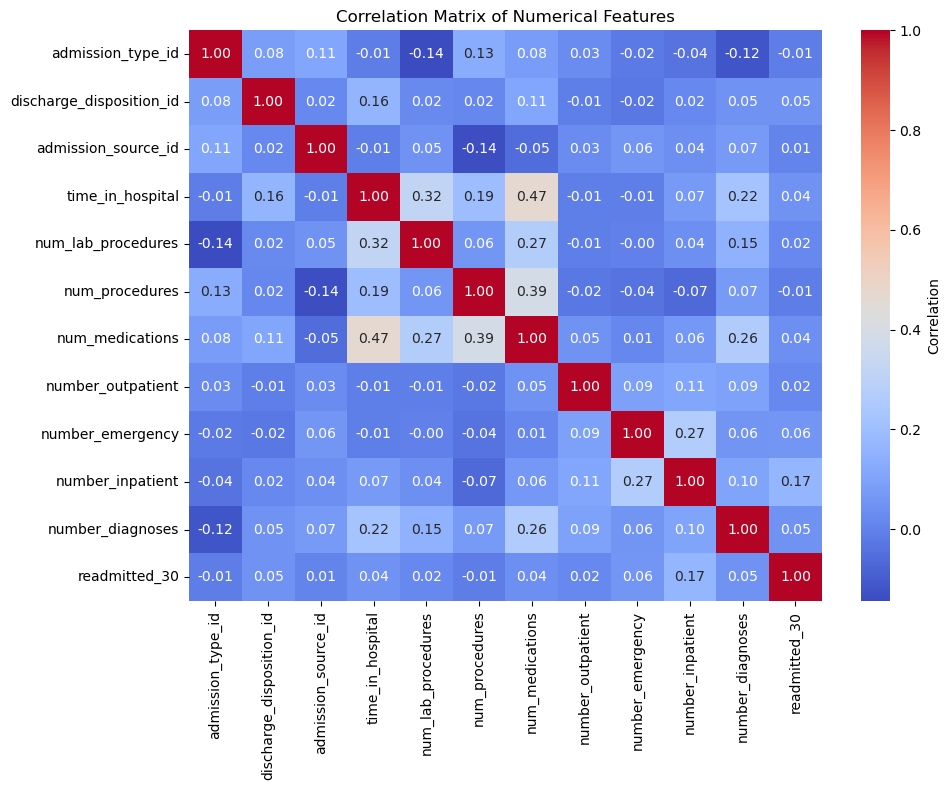

In [30]:
# If you have numerical features (e.g., number_inpatient, time_in_hospital)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()
